# Assignment 8: Classification with SVMs

# Total: 20 Marks 
## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline



In [1]:
# You may need these
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
import sklearn.svm as svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import recall_score, make_scorer, confusion_matrix
from sklearn.utils.multiclass import unique_labels

import matplotlib.pyplot as plt
%matplotlib inline

## Part A: 2 Mark

Read in the `emails.txt` dataset. Remove the `time`, `winner` and `number` columns.

In [2]:
df = pd.read_csv("email.txt", delimiter = "\t")
model_data = df.drop(['time','winner','number'], axis = 'columns')
print(model_data.columns)
model_data.head()


Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'inherit', 'viagra', 'password', 'num_char', 'line_breaks',
       'format', 're_subj', 'exclaim_subj', 'urgent_subj', 'exclaim_mess'],
      dtype='object')


,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
0,0,0,1,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1
2,0,0,1,0,0,0,0,4,1,0,0,7.773,192,1,0,0,0,6
3,0,0,1,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48
4,0,0,1,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1


## Part B: 2 Mark

Split the data into train and test.  Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
X = model_data.drop("spam", axis="columns").astype("float").values
y = model_data.spam.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size = 0.5, 
                                                random_state = 0)


## Part C: 1 Mark

Create a pipeline for your support vector machine.  You can start with a `kernel="rbf"` and `gamma="auto"`.  Scale your inputs before passing them to your model by including a `StandardScaler`.

In [4]:
model_pipeline = Pipeline([
    ('StandardScaler', StandardScaler(with_mean = True, with_std = True)),
    ('SVM',svm.SVC(kernel="rbf",gamma ="auto"))
    ])



## Part D: 3 Marks

Use your model to construct a confusion matrix by fitting and predicting on the training data (I've inlcluded a little helper function to make looking at the confusion matrix a little easier). Then answer the following using the confusion matrix (don't use sklearn's functions):

* What is your model's training accuracy?
* What is your model's training precision?
* What is your model's training recall?

In [5]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax


In [6]:
def check_performance(yhat, y):
    tp = sum(np.logical_and(yhat == 1, y == 1))
    tn = sum(np.logical_and(yhat == 0, y == 0))
    fp = sum(np.logical_and(yhat == 1, y == 0))
    fn = sum(np.logical_and(yhat == 0, y == 1))

    
    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    precision = tp / (tp + fp)
    
    # Recall
    recall = tp / (tp + fn)  
    
    
    print("accuracy:",round(accuracy,3),"precision:",round(precision,3),
          "recall:",round(recall,3))


    
    
    
    
    

Confusion matrix, without normalization


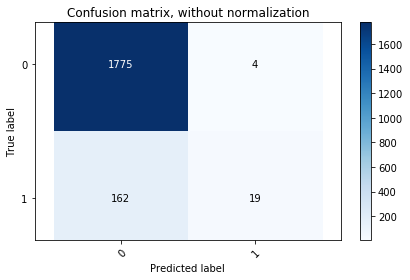

In [7]:
model_pipeline.fit(Xtrain,ytrain)
y_pred = model_pipeline.predict(Xtrain)
plot_confusion_matrix(ytrain, y_pred, np.array([0,1]),
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)






In [8]:
check_performance(y_pred,ytrain)


accuracy: 0.915 precision: 0.826 recall: 0.105


# Part E: 4 Marks

Imagine you are designing a model to filter out spam.  

* Would you want your model to have a high a high sensitivity?  Why or why not?  Answer in no more than 3 sentences.

* Would you wanr your model to have a low specificity? Why or why not? Answer in no more than 3 sentences

---


1. we want to have a high sensitivity because high sensitivity means high percentage of spams email were detected.
2. we don't want the model has low specificity, because low specificity means very few of non-spams email were treated as non-spam email.



## Part E:  1 Mark

Estimate your support vector machine's out of sample sensitivity by using 5 fold cross validation.

In [9]:
def sensitivity_score(y,yhat):
    TP = np.logical_and(y==1,yhat==1).sum()
    FN = np.logical_and(y==1,yhat==0).sum()
    return TP/(TP+FN)
scoring ={'sens':make_scorer(sensitivity_score)}
scores = cross_validate(model_pipeline, Xtrain, ytrain, scoring=scoring,cv=5, return_train_score=True)
np.mean(scores['test_sens'])


0.05555555555555556

## Part F: 4 Marks

Read the documentation for `GridSearchCV` in order to learn how to montior multiple metrics during grid search cross validation.  Once you have learned how to keep track of multiple scores, implement a grid search for your pipeline which monitors sensitivity and specificity. You will need to tell `GridsearchCV` which to prefer when it does the model selection (see the `refit` argument in the documentation). Note, sklearn does not have a `specificity_score` so you need to write your own function to do so. Search over your pipeline's kernel and gamma using `kernel = ['rbf','sigmoid']` and `gamma = np.linspace(1e-5, 5)`.

In [10]:
def specificity_score(y,yhat):
    TN = np.logical_and(y==0,yhat==0).sum()
    FP = np.logical_and(y==0,yhat==1).sum()
    return TN/(TN+FP)


scoring = {"spe":make_scorer(specificity_score),"sen":make_scorer(sensitivity_score)}
param_grid = {"SVM__kernel": ["sigmoid", "rbf"], "SVM__gamma": np.linspace(1e-5, 5)}
gscv = GridSearchCV(model_pipeline, param_grid= param_grid, cv = 5,scoring=scoring,refit ="sen")
gscv.fit(Xtrain,ytrain)


res = pd.DataFrame(gscv.cv_results_)



/Users/yufeixia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVM__gamma,param_SVM__kernel,params,split0_test_spe,split1_test_spe,split2_test_spe,...,std_test_spe,rank_test_spe,split0_test_sen,split1_test_sen,split2_test_sen,split3_test_sen,split4_test_sen,mean_test_sen,std_test_sen,rank_test_sen
0,0.021173,0.001815,0.007959,0.001322,1e-05,sigmoid,"{'SVM__gamma': 1e-05, 'SVM__kernel': 'sigmoid'}",1.000000,1.000000,1.000000,...,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99
1,0.021335,0.004476,0.008293,0.001514,1e-05,rbf,"{'SVM__gamma': 1e-05, 'SVM__kernel': 'rbf'}",1.000000,1.000000,1.000000,...,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99
2,0.020273,0.000772,0.007602,0.000233,0.102051,sigmoid,"{'SVM__gamma': 0.10205061224489796, 'SVM__kern...",0.991573,0.983146,0.997191,...,0.004698,52,0.000000,0.055556,0.027778,0.000000,0.000000,0.016667,0.022222,98
3,0.029172,0.001747,0.008612,0.000630,0.102051,rbf,"{'SVM__gamma': 0.10205061224489796, 'SVM__kern...",0.997191,0.994382,1.000000,...,0.002512,3,0.108108,0.027778,0.055556,0.138889,0.055556,0.077204,0.040352,95
4,0.022862,0.002884,0.008498,0.001027,0.204091,sigmoid,"{'SVM__gamma': 0.20409122448979594, 'SVM__kern...",0.985955,0.985955,0.991573,...,0.003382,53,0.000000,0.055556,0.055556,0.000000,0.000000,0.022222,0.027217,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.046223,0.001244,0.014681,0.000261,4.79592,rbf,"{'SVM__gamma': 4.795918775510204, 'SVM__kernel...",0.991573,0.991573,1.000000,...,0.003371,27,0.216216,0.138889,0.138889,0.194444,0.111111,0.159964,0.039064,74
96,0.024051,0.002287,0.008553,0.000848,4.89796,sigmoid,"{'SVM__gamma': 4.897959387755102, 'SVM__kernel...",0.949438,0.952247,0.921348,...,0.016632,60,0.000000,0.222222,0.305556,0.138889,0.000000,0.133333,0.120953,87
97,0.054695,0.004851,0.017692,0.003083,4.89796,rbf,"{'SVM__gamma': 4.897959387755102, 'SVM__kernel...",0.991573,0.991573,1.000000,...,0.003371,27,0.216216,0.138889,0.138889,0.194444,0.111111,0.159964,0.039064,74
98,0.025726,0.006917,0.008385,0.000938,5,sigmoid,"{'SVM__gamma': 5.0, 'SVM__kernel': 'sigmoid'}",0.912921,0.941011,0.921348,...,0.017460,73,0.135135,0.138889,0.305556,0.138889,0.055556,0.154845,0.081787,83


## Part G: 1 Mark

What was the cross validated sensitivity for your regularized model?


In [11]:
print(gscv.best_score_)

0.21596532757247044


## Part H: 1 Mark

Plot how the mean test sensitivity and specificity changes as `gamma` changes.  Color the lines according to `kernel`.

Text(0.5, 1.0, 'specificity vs gamma among rbf and sigmoid kernel')

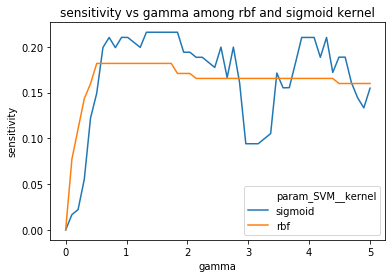

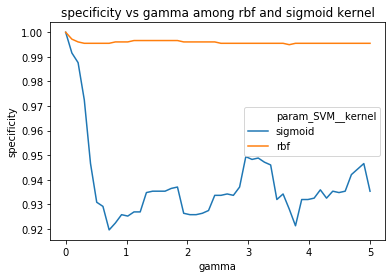

In [12]:
fig,ax= plt.subplots()
sns.lineplot(
    data=res, x="param_SVM__gamma", y="mean_test_sen", hue="param_SVM__kernel"
)
ax.legend()
ax.set_xlabel('gamma')
ax.set_ylabel('sensitivity')
ax.set_title('sensitivity vs gamma among rbf and sigmoid kernel')

fig2,ax2= plt.subplots()
sns.lineplot(
    data=res, x="param_SVM__gamma", y="mean_test_spe", hue="param_SVM__kernel"
)
ax2.legend()
ax2.set_xlabel('gamma')
ax2.set_ylabel('specificity')
ax2.set_title('specificity vs gamma among rbf and sigmoid kernel')

# Part I: 1 Mark

Use your selected model to predict on the test set.  Compute the test sensitivity and specificity.  Interpret the sensitivity and specificity in terms of the conditional probabilities.


In [13]:
display(specificity_score(ytest,gscv.best_estimator_.predict(Xtest)))
display(sensitivity_score(ytest,gscv.best_estimator_.predict(Xtest)))


0.9053521126760563

0.22043010752688172

In [14]:
we know that the sensitivity is 0.905, 
which means that given a email is spamed, the possibility it is gonna be detected is 0.905.
we know that the specificity is 0.220, 
which means that given a email is non-spamed, the possibility it is not gonna treated as spam is 0.220.



SyntaxError: invalid syntax (<ipython-input-14-1bcc7103ceaf>, line 1)